# Statistics for AI (July 30th, 2024)

In [ ]:
import numpy as np

In [ ]:
np.set_printoptions(precision=2)

In [ ]:
x = np.array([1.123456789])
x

array([1.12])

## 1. Binary probability

### Question 1: Compute mean

In [ ]:
# Question 1
def compute_mean(X):
    # your code here *********************
    return np.mean(X)


X = [2, 0, 2, 2, 7, 4, -2, 5, -1, -1]

print("Mean: ", compute_mean(X))

Mean:  1.8


### Question 2: Compute median

In [ ]:
# Question 2

def compute_median(X):
    size = len(X)
    X = np.sort(X)
    print(X)
    if (size % 2 == 0):
        # your code here **************************
        # np.median(X)
        return np.mean([X[int(size/2)], X[int(size/2)-1]])
    else:
        # np.median(X)
        return X[int((size-1)/2)]  # your code here **************************


X = [1, 5, 4, 4, 9, 13]
print("Median: ", compute_median(X))

[ 1  4  4  5  9 13]
Median:  4.5


### Question 3: Compute std

In [ ]:
# Question 3


def compute_std(X):
    mean = compute_mean(X)
    variance = 0
    # your code here *******************
    # Solution 1: variance = np.var(X, ddof=0)

    # Solution 2: variance = np.mean([(x_i - mean) ** 2 for x_i in X])

    # Solution 3:
    # from functools import reduce
    # variance = reduce(lambda var, x_i: var + (x_i-mean)**2, X, variance)
    # variance /= len(X)

    for x_i in X:
        variance += (x_i - mean) ** 2
    variance /= len(X)
    return np.sqrt(variance)


X = [171, 176, 155, 167, 169, 182]
print(compute_std(X))

8.32666399786453


### Question 4: Compute correlation coefficient

In [ ]:
# Question 4

def compute_correlation_cofficient(X, Y):
    N = len(X)
    numerator = 0
    denominator = 0
    # your code here ****************
    mean_X, std_X = compute_mean(X), compute_std(X)
    mean_Y, std_Y = compute_mean(Y), compute_std(Y)
    numerator = np.mean(((X - mean_X) * (Y - mean_Y)))
    denominator = std_X * std_Y

    # return np.round(np.corrcoef(X, Y)[0, 1], 2)
    return np.round(numerator/denominator, 2)


X = np. asarray([-2, -5, -11, 6, 4, 15, 9])
Y = np. asarray([4, 25, 121, 36, 16, 225, 81])
print(" Correlation : ", compute_correlation_cofficient(X, Y))

 Correlation :  0.42


## 2. Tabular analysis

In [ ]:
!gdown 1iA0WmVfW88HyJvTBSQDI5vesf-pgKabq
import pandas as pd

Downloading...
From: https://drive.google.com/uc?id=1iA0WmVfW88HyJvTBSQDI5vesf-pgKabq
To: d:\E-Learning\AIO_2024\AIO-2024-Exercise\Module 2\Week 4\advertising.csv

  0%|          | 0.00/4.06k [00:00<?, ?B/s]
100%|██████████| 4.06k/4.06k [00:00<?, ?B/s]


### Question 5


In [ ]:
data = pd.read_csv("advertising.csv")
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
def correlation(x, y):
    # Your code here #
    return compute_correlation_cofficient(x, y)


# Example usage :
x = data['TV']
y = data['Radio']
corr_xy = correlation(x, y)
print(f"Correlation between TV and Sales: {round(corr_xy, 2)}")

Correlation between TV and Sales: 0.05


### Question 6

In [ ]:
features = ['TV', 'Radio', 'Newspaper']

for feature_1 in features:
    for feature_2 in features:
        correlation_value = correlation(data[feature_1], data[feature_2])
        print(
            f"Correlation between {feature_1} and {feature_2}: {round(correlation_value, 2)}")

Correlation between TV and TV: 1.0
Correlation between TV and Radio: 0.05
Correlation between TV and Newspaper: 0.06
Correlation between Radio and TV: 0.05
Correlation between Radio and Radio: 1.0
Correlation between Radio and Newspaper: 0.35
Correlation between Newspaper and TV: 0.06
Correlation between Newspaper and Radio: 0.35
Correlation between Newspaper and Newspaper: 1.0


### Question 7

In [ ]:
x = data['Radio']
y = data['Newspaper']

result = np.corrcoef(x, y)  # Your code here #
print(result)

# Expected output : [[1. 0.35410375]
#                    [0.35410375 1. ]]

[[1.   0.35]
 [0.35 1.  ]]


### Question 8

In [ ]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


### Question 9

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

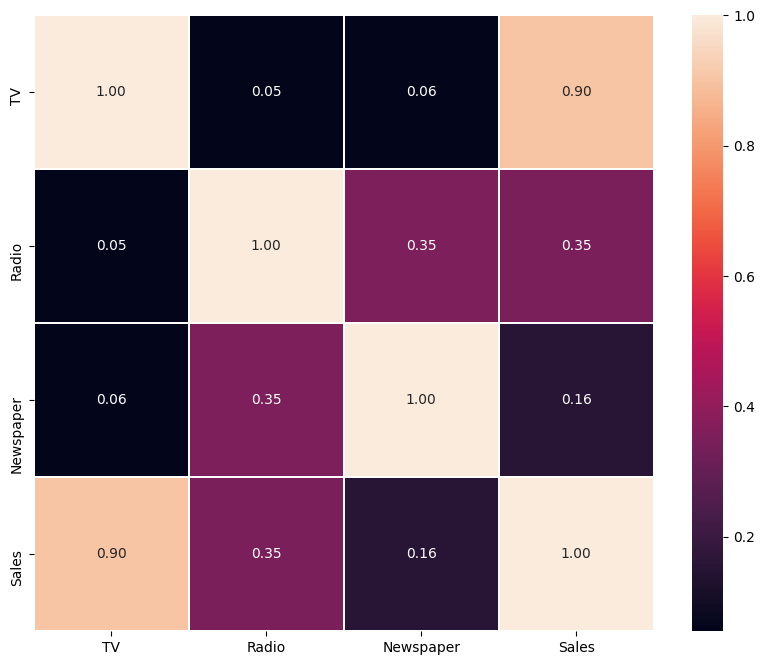

In [ ]:
plt . figure(figsize=(10, 8))
# Your code here #
sns.heatmap(data.corr(), annot=True, fmt=".2f", linewidth=.5)
plt.show()

## 3. Text retrieval

In [ ]:
!gdown 1jh2p2DlaWsDo_vEWIcTrNh3mUuXd-cw6
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

Downloading...
From: https://drive.google.com/uc?id=1jh2p2DlaWsDo_vEWIcTrNh3mUuXd-cw6
To: d:\E-Learning\AIO_2024\AIO-2024-Exercise\Module 2\Week 4\vi_text_retrieval.csv

  0%|          | 0.00/201k [00:00<?, ?B/s]
100%|██████████| 201k/201k [00:00<00:00, 1.08MB/s]
100%|██████████| 201k/201k [00:00<00:00, 1.07MB/s]


In [ ]:
vi_data_df = pd.read_csv("vi_text_retrieval.csv")
context = vi_data_df['text']
context = [doc.lower() for doc in context]
len(context)

500

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
context_embedded = tfidf_vectorizer.fit_transform(context)
context_embedded.toarray()[7][0]

0.31126580760710637

In [ ]:
context_embedded.toarray().shape

(500, 2913)

### Question 11

In [ ]:
def tfidf_search(question, tfidf_vectorizer: TfidfVectorizer, top_d=5):
    # lowercasing before encoding
    query_embedded = tfidf_vectorizer.transform(
        [question.lower()]).toarray()  # Your Code Here ********
    cosine_scores = cosine_similarity(
        query_embedded, context_embedded)[0]  # Your Code Here ********

    # Get top k cosine score and index its
    results = []
    for idx in cosine_scores.argsort()[-top_d:][:: -1]:
        doc_score = {
            'id': idx,
            'cosine_score': cosine_scores[idx]
        }
        results.append(doc_score)
    return results


question = vi_data_df.iloc[0]['question']
results = tfidf_search(question, tfidf_vectorizer, top_d=5)
results[0]['cosine_score']

0.6279910475266974

### Question 12

In [ ]:
def corr_search(question, tfidf_vectorizer, top_d=5):
    # lowercasing before encoding
    query_embedded = tfidf_vectorizer.transform(
        [question.lower()]).toarray()[0]  # Your Code Here ******
    # Your Code Here ******
    corr_scores = np.corrcoef(context_embedded.toarray(),
                              query_embedded)[-1][:-1]
    # Get top k correlation score and index its
    results = []
    for idx in corr_scores.argsort()[-top_d:][:: -1]:
        doc = {
            'id': idx,
            'corr_score': corr_scores[idx]
        }
        results.append(doc)
    return results


question = vi_data_df.iloc[0]['question']
results = corr_search(question, tfidf_vectorizer, top_d=5)
results[1]['corr_score']

0.20734246471973253
